In [239]:
import pandas as pd
import numpy as np
import os
import nltk
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [240]:
import pandas as pd

In [241]:
df = pd.read_excel('/content/drive/MyDrive/Attribute DataSet.xlsx')

In [242]:
print(df)

       Dress_ID    Style    Price  Rating  Size  Season   NeckLine  \
0    1006032852     Sexy      Low     4.6     M  Summer     o-neck   
1    1212192089   Casual      Low     0.0     L  Summer     o-neck   
2    1190380701  vintage     High     0.0     L  Automn     o-neck   
3     966005983    Brief  Average     4.6     L  Spring     o-neck   
4     876339541     cute      Low     4.5     M  Summer     o-neck   
..          ...      ...      ...     ...   ...     ...        ...   
495   713391965   Casual      Low     4.7     M  Spring     o-neck   
496   722565148     Sexy      Low     4.3  free  Summer     o-neck   
497   532874347   Casual  Average     4.7     M  Summer     v-neck   
498   655464934   Casual  Average     4.6     L  winter  boat-neck   
499   919930954   Casual      Low     4.4  free  Summer     v-neck   

    SleeveLength waiseline       Material  FabricType  Decoration  \
0      sleevless    empire            NaN     chiffon     ruffles   
1          Petal   na

In [243]:
df.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [244]:
# Checking for null values
print(df.isnull().sum())

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
waiseline          87
Material          128
FabricType        266
Decoration        236
Pattern Type      109
Recommendation      0
dtype: int64


In [245]:
# Dropping null values since it makes only around 0.55% of whole data
DF = df.dropna()
print(DF.isnull().sum())

Dress_ID          0
Style             0
Price             0
Rating            0
Size              0
Season            0
NeckLine          0
SleeveLength      0
waiseline         0
Material          0
FabricType        0
Decoration        0
Pattern Type      0
Recommendation    0
dtype: int64


In [246]:
df.shape

(500, 14)

In [247]:
df.isnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
waiseline          87
Material          128
FabricType        266
Decoration        236
Pattern Type      109
Recommendation      0
dtype: int64

In [248]:
df.isnull().sum().sum()

835

In [249]:
df = df.loc[:, df.notnull().any(axis = 0)]
print (df)


       Dress_ID    Style    Price  Rating  Size  Season   NeckLine  \
0    1006032852     Sexy      Low     4.6     M  Summer     o-neck   
1    1212192089   Casual      Low     0.0     L  Summer     o-neck   
2    1190380701  vintage     High     0.0     L  Automn     o-neck   
3     966005983    Brief  Average     4.6     L  Spring     o-neck   
4     876339541     cute      Low     4.5     M  Summer     o-neck   
..          ...      ...      ...     ...   ...     ...        ...   
495   713391965   Casual      Low     4.7     M  Spring     o-neck   
496   722565148     Sexy      Low     4.3  free  Summer     o-neck   
497   532874347   Casual  Average     4.7     M  Summer     v-neck   
498   655464934   Casual  Average     4.6     L  winter  boat-neck   
499   919930954   Casual      Low     4.4  free  Summer     v-neck   

    SleeveLength waiseline       Material  FabricType  Decoration  \
0      sleevless    empire            NaN     chiffon     ruffles   
1          Petal   na

In [250]:
df.drop("Dress_ID", axis='columns', inplace = True)
print(df.head())

     Style    Price  Rating Size  Season NeckLine SleeveLength waiseline  \
0     Sexy      Low     4.6    M  Summer   o-neck    sleevless    empire   
1   Casual      Low     0.0    L  Summer   o-neck        Petal   natural   
2  vintage     High     0.0    L  Automn   o-neck         full   natural   
3    Brief  Average     4.6    L  Spring   o-neck         full   natural   
4     cute      Low     4.5    M  Summer   o-neck    butterfly   natural   

        Material FabricType  Decoration Pattern Type  Recommendation  
0            NaN    chiffon     ruffles       animal               1  
1     microfiber        NaN     ruffles       animal               0  
2       polyster        NaN         NaN        print               0  
3           silk    chiffon  embroidary        print               1  
4  chiffonfabric    chiffon         bow          dot               0  


In [251]:
df.rename(columns = {'Recommendation':'Sentiment'}, inplace = True)
print(df.columns)

Index(['Style', 'Price', 'Rating', 'Size', 'Season', 'NeckLine',
       'SleeveLength', 'waiseline', 'Material', 'FabricType', 'Decoration',
       'Pattern Type', 'Sentiment'],
      dtype='object')


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Style         500 non-null    object 
 1   Price         498 non-null    object 
 2   Rating        500 non-null    float64
 3   Size          500 non-null    object 
 4   Season        498 non-null    object 
 5   NeckLine      497 non-null    object 
 6   SleeveLength  498 non-null    object 
 7   waiseline     413 non-null    object 
 8   Material      372 non-null    object 
 9   FabricType    234 non-null    object 
 10  Decoration    264 non-null    object 
 11  Pattern Type  391 non-null    object 
 12  Sentiment     500 non-null    int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 50.9+ KB


In [253]:
df.describe()

,Rating,Sentiment
count,500.000000,500.000000
mean,3.528600,0.420000
std,2.005364,0.494053
min,0.000000,0.000000
25%,3.700000,0.000000
50%,4.600000,0.000000
75%,4.800000,1.000000
max,5.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Rating'], df['Sentiment'], test_size=0.2, random_state=0)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

In [ ]:
#Value Counts for Dress_ID
df['Dress_ID'].value_counts()

In [ ]:
#Value Counts for Rating
df['Rating'].value_counts()

In [ ]:
#Value Counts for Recommendation
df['Recommendation'].value_counts()

In [260]:
#Value Counts for Size
df['Size'].value_counts()

M        177
free     173
L         96
S         37
XL        15
small      1
s          1
Name: Size, dtype: int64

In [ ]:
#Value Counts for Season
df['Season'].value_counts()

In [262]:

df.columns

Index(['Style', 'Price', 'Rating', 'Size', 'Season', 'NeckLine',
       'SleeveLength', 'waiseline', 'Material', 'FabricType', 'Decoration',
       'Pattern Type', 'Sentiment'],
      dtype='object')

In [ ]:
df.Size.replace({'M':"Medium", 'L':'Large', 'XL':'Extra Large', 'free':'Free', 'S':'Small', 's':'Small', 'small':'Small'},inplace =True)

In [267]:
# Print the value counts of each category in "Size" column.
df.Size.value_counts()/df.Size.shape[0] *100.0

M        35.4
free     34.6
L        19.2
S         7.4
XL        3.0
small     0.2
s         0.2
Name: Size, dtype: float64

In [266]:
# Print the value counts of each category in "Style" column.
df.Style.value_counts()/df.Style.shape[0] *100.0

Casual      46.4
Sexy        13.8
party       10.2
cute         9.0
vintage      5.0
bohemian     4.8
Brief        3.6
work         3.4
Novelty      1.6
sexy         1.4
Flare        0.4
OL           0.2
fashion      0.2
Name: Style, dtype: float64

In [265]:
df.sum()

Style        SexyCasualvintageBriefcutebohemianCasualNovelt...
Rating                                                  1764.3
Size         MLLLMMXLfreefreefreefreefreeMMMfreeLfreeMMLMXL...
Sentiment                                                  210
dtype: object

In [264]:
#correcting the spellings.
df.Season= df.Season.replace('Automn', "Autumn")

df.Season= df.Season.replace('spring', "Spring")

df.Season= df.Season.replace('winter', "Winter")

In [ ]:
print(df.Season)

EDA

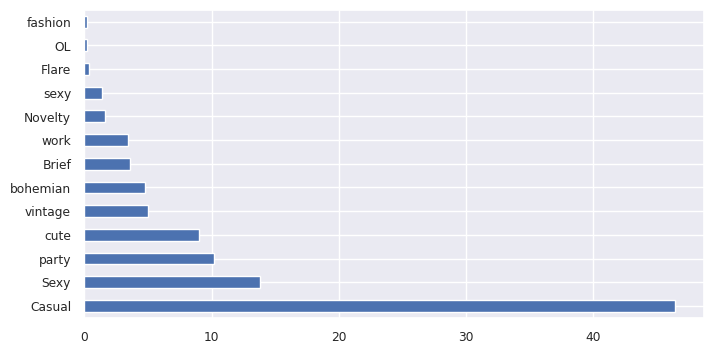

In [289]:
# Calculate the percentage of each categories in the "Style" variable.
(round(df.Style.value_counts(normalize=True)*100.0,1)).plot.barh()
plt.show()

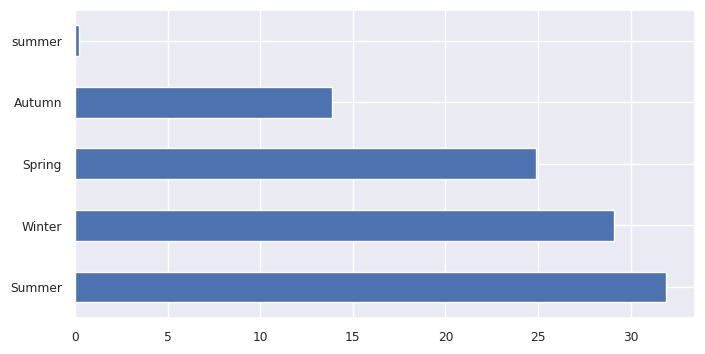

In [268]:
# Calculate the percentage of each categories in the "Season" variable.
(round(df.Season.value_counts(normalize=True)*100.0,1)).plot.barh()
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
_ = sns.heatmap(df[['Dress_ID','Style','Price','Rating','Size','Season']].corr(), square=True, cmap='Blues',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')

plt.show()

In [ ]:
df.groupby(by = 'Price')['Rating'].mean()

In [ ]:
sns.boxplot(data = df, x = 'Price', y = 'Rating', palette= 'RdYlBu')
plt.show()

In [ ]:
print(df.groupby('Recommendation').mean())
sns.boxplot(data=df, x="Recommendation")
plt.show()

In [ ]:
df.groupby(['Size'])['Recommendation'].mean().plot.bar()
plt.show()

In [ ]:
res = pd.pivot_table(data=df, index="Style", columns="Price", values="Recommendation")
sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.427)
plt.show()

In [ ]:
# Find the median of Ratings for each Style category.
df['Rating'].groupby(df['Style']).median()

In [290]:
# Find the median of Ratings for each Style category.
df['Recommendation'].groupby(df['Season']).mean()

KeyError: ignored

Input/Remove Missing Values

In [292]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 3 to 499
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Style         99 non-null     object 
 1   Price         99 non-null     object 
 2   Rating        99 non-null     float64
 3   Size          99 non-null     object 
 4   Season        99 non-null     object 
 5   NeckLine      99 non-null     object 
 6   SleeveLength  99 non-null     object 
 7   waiseline     99 non-null     object 
 8   Material      99 non-null     object 
 9   FabricType    99 non-null     object 
 10  Decoration    99 non-null     object 
 11  Pattern Type  99 non-null     object 
 12  Sentiment     99 non-null     int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 10.8+ KB
None


In [ ]:
missing_val = pd.DataFrame(df.isnull().sum())
missing_val = missing_val.reset_index()
missing_val

In [ ]:
df[df['Price'].isna()]

In [291]:
df.dropna(inplace=True)
print(df.dropna)

<bound method DataFrame.dropna of         Style    Price  Rating  Size  Season   NeckLine SleeveLength  \
3       Brief  Average     4.6     L  Spring     o-neck         full   
4        cute      Low     4.5     M  Summer     o-neck    butterfly   
8       Flare  Average     0.0  free  Spring     v-neck        short   
10      party  Average     5.0  free  Summer     o-neck         full   
28       cute      Low     4.3  free  Autumn     o-neck    sleevless   
..        ...      ...     ...   ...     ...        ...          ...   
488    Casual      Low     4.4     M  Summer     o-neck   halfsleeve   
490    Casual      Low     4.8  free  Winter    bowneck         full   
493  bohemian      Low     4.6  free  Summer     o-neck    sleevless   
498    Casual  Average     4.6     L  Winter  boat-neck    sleevless   
499    Casual      Low     4.4  free  Summer     v-neck        short   

    waiseline       Material  FabricType  Decoration Pattern Type  Sentiment  
3     natural         

In [294]:
#correcting the spellings.
df['Season'].unique()

array(['Spring', 'Summer', 'Autumn', 'Winter'], dtype=object)

In [295]:
#replacement of Season
df['Season'].replace(['Automn','winter'], ['Autumn','Winter'], inplace=True)
df['Season'].unique()

array(['Spring', 'Summer', 'Autumn', 'Winter'], dtype=object)

In [296]:
df['SleeveLength'].unique()

array(['full', 'butterfly', 'short', 'sleevless', 'halfsleeve',
       'threequarter', 'thressqatar'], dtype=object)

In [297]:
df['SleeveLength'].replace(['thressqatar'], ['threequarter'], inplace=True)
df['SleeveLength'].unique()

array(['full', 'butterfly', 'short', 'sleevless', 'halfsleeve',
       'threequarter'], dtype=object)

In [298]:
df.isnull().sum().sum()

0

In [ ]:
from sklearn.model_selection import train_test_split
X = df
y = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X,y)

In [300]:
print(df['Recommendation'])

KeyError: ignored

In [301]:

#Sentiment
df['Sentiment'] = np.where(df['Recommendation'] > 5, 1, 0)
df.head()
     


KeyError: ignored

In [ ]:
df['Sentiment'].value_counts()

In [ ]:
sns.set(font_scale = 0.8, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [8, 4]
sns.countplot(x=df["Sentiment"])
     

In [ ]:
df['Sentiment'].describe()

TRAIN TEST SPLIT


In [271]:
X_train = df.loc[:,'Rating'].values
y_train = df.loc[:,['Size']].values


In [ ]:
print(X_train)


In [ ]:
print(y_train)

In [274]:
X_train.shape

(500,)

In [275]:
y_train.shape

(500, 1)

In [276]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Rating'], df['Sentiment'], test_size=0.2, random_state=0)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (400,)
The Test set size  (100,)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [284]:
X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)


In [285]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [286]:
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [287]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score

In [288]:
predictions = lr.predict(X_test)
modelEvaluation(predictions)


Accuracy on validation set: 0.6400

AUC score : 0.5000

Classification report : 
               precision    recall  f1-score   support

           0       0.64      1.00      0.78        64
           1       0.00      0.00      0.00        36

    accuracy                           0.64       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.41      0.64      0.50       100


Confusion Matrix : 
 [[64  0]
 [36  0]]
